In [37]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import math
from sklearn.metrics import r2_score
sns.set(style='ticks', palette='Set2')
%matplotlib inline

## 1. Correlations.
- When given a data matrix, an easy way to tell if any two columns are correlated is to
look at a scatter plot of each column against each other column. For a warm up, do this:
Look at the data in DF1 in HW2 Data.zip. Which columns are (pairwise) correlated?
Figure out how to do this with Pandas, and also how to do this with Seaborn.
- Compute the covariance matrix of the data. Write the explicit expression for what this
is, and then use any command you like (e.g., np.cov) to compute the 4 × 4 matrix.
Explain why the numbers that you get fit with the plots you got.
- The above problem in reverse. Generate a zero-mean multivariate Gaussian random
variable in 3 dimensions, Z = (X1, X2, X3) so that (X1, X2) and (X1, X3) are uncorrelated, but (X2, X3) are correlated. Specifically: choose a covariance matrix that has the
above correlations structure, and write this down. Then find a way to generate samples
from this Gaussian. Choose one of the non-zero covariance terms (Cij , if C denotes
your covariance matrix) and plot it vs the estimated covariance term, as the number of
samples you use scales. The goal is to get a visual representation of how the empirical
covariance converges to the true (or family) covariance.

In [416]:
data = pd.read_csv(r"HW2_Data/DF1", sep = ",", index_col = 0)
df = pd.DataFrame(data) 
df.head()

,0,1,2,3
0,1.038502,0.899865,0.835053,-0.971528
1,0.320455,-0.647459,0.149079,0.352593
2,0.055480,2.234771,0.271672,-2.108739
3,-0.007260,-0.524299,-0.126550,0.670827
4,-1.237390,-1.377017,-1.049932,1.342079


In [418]:
#1-1
df.corr()

,0,1,2,3
0,1.000000,-0.003998,0.990066,0.004111
1,-0.003998,1.000000,-0.004085,-0.990235
2,0.990066,-0.004085,1.000000,0.004067
3,0.004111,-0.990235,0.004067,1.000000


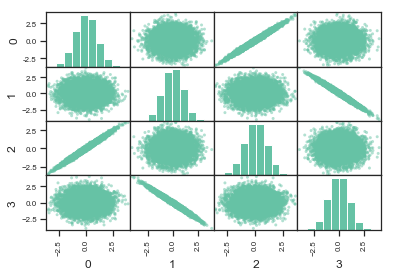

In [68]:
pd.plotting.scatter_matrix(df)
plt.show()

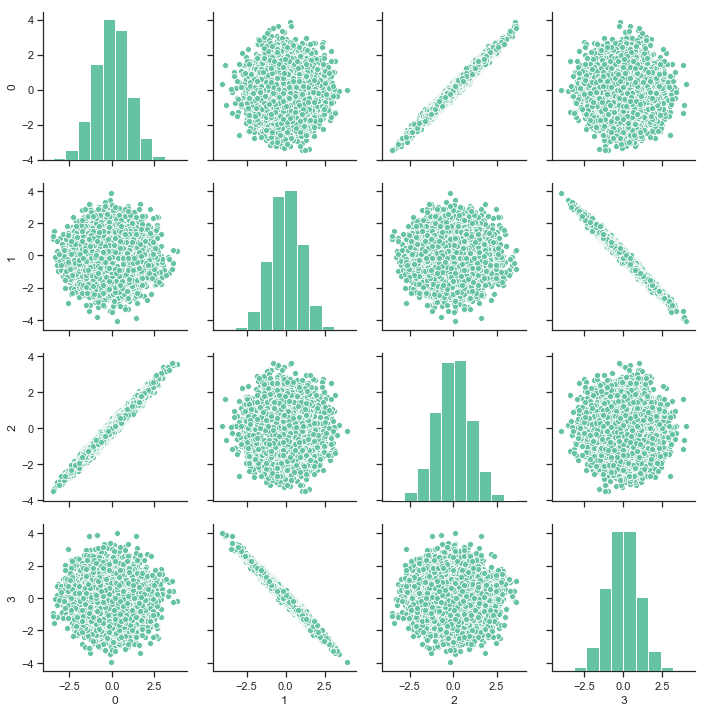

In [419]:
dfplot = sns.pairplot(df)
sns.despine()

In [47]:
#1-2
df.cov()

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


#### Explantion
Covariance is a measure of how much two variables vary together. It can take any value between -infinity to +infinity, where the negative value represents the negative relationship whereas a positive value represents the positive relationship. It is used for the linear relationship between variables.

By looking into the plots we got, we can see when the two data sets have little relationships, their covariance value are getting close to 0. On the other hand, when the two data sets have close relationship with each other, the has covariance value is larger(close to 1 in this case). We also can see the +/- match the direction vary between two data sets.

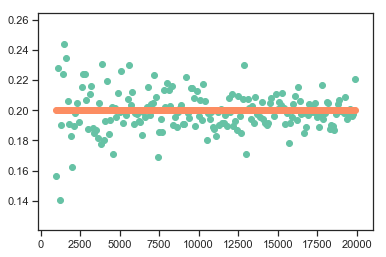

In [480]:
#1-3
mean = [0, 0, 0]
cov = [[1, 0, 0], [0, 1, 0.2], [0, 0.2, 1]]
values = []
estvalues = []
for i in range(1000,20000,100):
    sample = np.random.multivariate_normal(mean, cov, i).T
    samplecov = np.cov(sample)
    values.append((i, samplecov[1,2]))
    estvalues.append((i, cov[1][2]))

plt.scatter(*zip(*values))
plt.scatter(*zip(*estvalues))

## 2. Outliers – Optional. 
Consider the two-dimensional data in DF2 in Lab2 Data.zip. Look at
a scatter plot of the data. It contains two points that look like potential outliers. Which one
is “more” outlying? Propose a transformation of the data that makes it clear that the point
at (−1, 1) is more outlying than the point at (5.5, 5), even though the latter point is“farther
away” from the nearest points. Plot the data again after performing this transformation.
Provide discussion as appropriate to justify your choice of transformation. Hint: if y comes
from a standard Gaussian in two dimensions (i.e., with covariance equal to the two by two
identity matrix), and $Q = \left\lgroup\matrix{2&1/2\cr1/2&2}\right\rgroup$ what is the covariance matrix of the random variable z = Qy? If you are given z, how would you create a random Gaussian vector with covariance equal to the identity, using z?

## 3. Even More Standard Error 
(You may want to first look at the last written exercise below).
In one of the written exercises below, you derive an expression for what is called the Standard
1
Error: where β denotes the “truth,” βˆ denotes the value we compute using least squares
linear regression, and Z and e are as in the exercise below, you find: $\hat{β} − β = Ze$

If we know the distribution of the noise (the distribution generating the noise vectors, ei),
then we know the distribution for the error, $(\hat{β} − β)$. This allows us to answer the question
given in class: if we solve a regression and obtain value $\hat{β}$, how can we tell if it is statistically
significant? The answer is: we compare the size of βˆ to the spread introduced by the noise
(i.e., the standard error), and we ask: what is the likelihood that the true β = 0, and what
we observed was purely due to the noise.

If the noise is Gaussian (normal), i.e., ei ∼ N(0, σ2
), and if the values of the xi are normalized,
then we expect error of the size σ/√
n, as this is roughly the standard deviation of the
expression for the error that you derive above. This means: if you have twice the data points,
you should expect the error to be reduced by about 1.4 (the formula says that the standard
deviation of the error would decrease by a factor of $1/\sqrt{2}$.

Compute this empirically, as follows: We will generate data for a regression problem, solve
it, and see what the error is: Generate data as I did in the example from class: $xi ∼ N(0, 1)$,
$ei ∼ N(0, 1)$. Generate y by $yi = β0 + xiβ + ei$
, where β0 = −3 and β = 0. Note that since β = 0, this means that y and x are unrelated! The question we are exploring here is as
follows: when we solve a regression problem, we are not going to find $\hat{β} = 0$ – we will find
that $\hat{β}$ takes some other values, hopefully close to zero. How do we know if the value of $\hat{β}$ we
get is statistically meaningful?

- By creating fresh data and each time computing βˆ and recording βˆ − β, compute the
empirical standard deviation of the error for n = 150 (the number we used in class). In
class, in the exercise where I tried to find a linear regression of y vs. noise, we found
βˆ = −0.15. Given your empirical computation of the standard deviation of the error,
how significant is the value −0.15?
- Now repeat the above experiment for different values of n. Plot these values, and on the
same plot, plot $1/\sqrt{n}$. How is the fit?


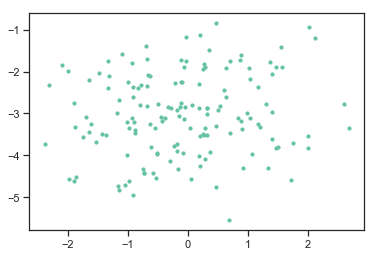

In [491]:
# 3-1
mu = 0
sigma = 1
ei = np.random.normal(mu, sigma, 150)
X = np.random.normal(mu, sigma, 150)
Y = -3 + (xi)*0 + (ei)

plt.scatter(X,Y,s=10)

[[0.110465]] [-3.01888065]


/Users/apple/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


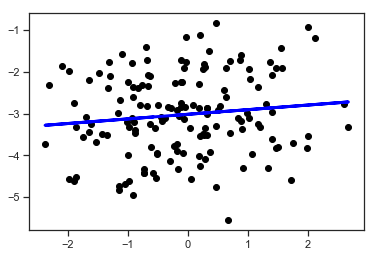

In [492]:
pair = [(X[i], Y[i]) for i in range(len(X))]
createdf = pd.DataFrame(pair, columns = ['X','Y'])
createdf_X = createdf.as_matrix(["X"])
createdf_Y = createdf.as_matrix(["Y"])
lr = linear_model.LinearRegression()
lr.fit(createdf_X,createdf_Y)
print (lr.coef_, lr.intercept_)
plt.scatter(createdf_X, createdf_Y,  color='black')
plt.plot(createdf_X, lr.predict(createdf_X), color='blue',
         linewidth=3)

In [493]:
# noise std
noisestd = ei.std()
noisestd

0.9708823028300295

In [494]:
# Calculate Var(B_hat)
sumX = sum(X**2)
VarBHat = (noisestd**2)*(1/sumX)
print(VarBHat)

0.005479470797185321


In [495]:
# Calculate Std of B_hat
math.sqrt(VarBHat)

0.07402344761753077

#### Conclusion
Given that estimation of $\hat{\beta}$ is unbiased, value −0.15 is significant because it lies within two standard deviations.

In [429]:
# 3-2
values = []
for i in range(1000,20000,200):
    mu = 0
    sigma = 1
    ei = np.random.normal(mu, sigma, i)
    X = np.random.normal(mu, sigma, i)
    Y = -3 + (xi)*0 + (ei)
    pair = [(X[i], Y[i]) for i in range(len(X))]
    createdfbig = pd.DataFrame(pair, columns = ['X','Y'])
    noisestd = ei.std()
    sumX = sum(X**2)
    VarBHat = (noisestd**2)*(1/sumX)
    std = math.sqrt(VarBHat)
    sqrti = 1/math.sqrt(i)
    values.append((i, std, sqrti))

In [430]:
valuesnum = [values[i][0] for i in range(len(values))]
valuesstd = [values[i][1] for i in range(len(values))]
valuessqrti = [values[i][2] for i in range(len(values))]
pair = [(valuesnum[i], valuesstd[i]) for i in range(len(valuesnum))]
pairsqrt = [(valuesnum[i], valuessqrti[i]) for i in range(len(valuesnum))]
createdfbig = pd.DataFrame(pair, columns = ['number','std'])
createdfsqrt = pd.DataFrame(pairsqrt, columns = ['number','sqrt'])
createdfbig.head(5)
createdfsqrt.head(5)

,number,sqrt
0,1000,0.031623
1,1200,0.028868
2,1400,0.026726
3,1600,0.025000
4,1800,0.023570


/Users/apple/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/apple/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/apple/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


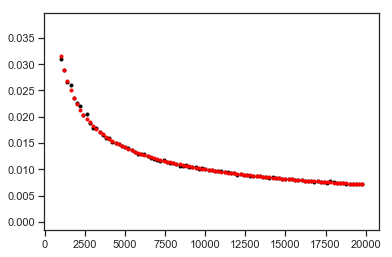

In [431]:
createdfbig_X = createdfbig.as_matrix(["number"])
createdfbig_Y = createdfbig.as_matrix(["std"])
createdfsqrt_A = createdfsqrt.as_matrix(["number"])
createdfsqrt_B = createdfsqrt.as_matrix(["sqrt"])
plt.scatter(createdfbig_X, createdfbig_Y, marker='.', color='black')
plt.scatter(createdfsqrt_A, createdfsqrt_B, marker='.', color='red')

## 4. Names and Frequencies. 
The goal of this exercise is for you to get more experience with
Pandas, and to get a chance to explore a cool data set. Download the file Names.zip from
Canvas. This contains the frequency of all names that appeared more than 5 times on a social
security application from 1880 through 2015.
- Write a program that on input k and XXXX, returns the top k names from year
XXXX.
- Write a program that on input Name returns the frequency for men and women of the
name Name.
- It could be that names are more diverse now than they were in 1880, so that a name may
be relatively the most popular, though its frequency may have been decreasing over the
years. Modify the above to return the relative frequency. Note that in the next coming
lectures we will learn how to quantify diversity using entropy.
- Find all the names that used to be more popular for one gender, but then became more
popular for another gender.

## 5. Regression and Interaction Terms. 
Run through the Jupyter Notebook from Thursday’s
class. You will have to download the data set yourselves. Then do the exercise of adding an
interaction term. Explain what you see, and how it relates to the graph you obtain before
adding the interaction term. That is, use plots / visualization, to argue convincingly that the
interaction term should or shouldn’t be there, and then tell us what this means.